<a href="https://colab.research.google.com/github/ArnavGupta-codes/MNIST-Dataset/blob/main/Predictions_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Things Learned:
- How we are predicting values based on just maths actually
- Could have stopped the no. of iterations before coz there was not much change in loss
- Visualizing Data is very important
- Things more to learn how can we select a better model, although we will have to then also calc training loss and cross validation loss to figure out the better one.
- Coding only using numpy gave more understanding of how using maths we are creating these
- Basically we initialize W and b and parameters, then find the value then using back prop we find the direction in which if we go then we will get better values, we update the value and run a gradient descent which in each iteration does this thing, to lower the value of loss function.

This is the file for train, test, sample submission files downloaded from the google drive given in the assignment, IT also contains the final submission file for prediction on the test set ( Link: "https://drive.google.com/drive/u/0/folders/1LcrjLCoCoh_V7tSGTK4fVVFNd3BarvtY")

### 1. Importing Libraries and Data

In [ ]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sample_submission.csv to sample_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
data = pd.read_csv('/content/train.csv')

In [ ]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[:1000].T
print(f"Data_dev: {data_dev}")
Y_dev = data_dev[0]
print(f"Y_dev: ${Y_dev}")
X_dev = data_dev[1:n]
print(f"X_dev: ${X_dev}")
X_dev = X_dev/ 255.
print(f"X_dev after changes: ${X_dev}")

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

Data_dev: [[3 7 1 ... 6 3 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Y_dev: $[3 7 1 2 7 1 3 1 2 4 4 8 9 1 2 7 7 3 6 2 0 0 3 1 1 4 3 7 7 5 4 6 0 2 8 4 1
 9 8 0 7 5 3 9 0 7 1 5 1 5 0 2 5 7 5 0 6 0 8 4 7 9 5 5 3 7 5 0 3 5 7 9 9 5
 8 3 1 4 2 4 0 4 9 1 5 3 0 6 0 5 3 5 5 3 3 1 9 5 6 5 8 6 2 8 8 8 1 0 2 7 0
 8 1 4 6 5 6 7 3 5 1 2 1 9 9 6 8 5 3 4 0 4 5 9 9 0 0 9 8 8 1 5 4 0 1 1 1 9
 7 1 2 9 9 9 9 4 9 5 5 0 1 2 8 4 7 7 2 7 7 1 8 6 5 3 4 8 5 1 5 7 4 3 7 1 7
 6 4 9 5 3 9 8 7 4 4 3 9 9 5 3 2 1 9 8 1 3 2 7 9 1 6 9 6 3 8 5 9 0 5 8 5 9
 8 5 7 2 1 1 9 2 0 4 0 3 0 7 2 7 8 9 9 1 8 7 0 3 8 2 6 3 3 4 6 5 7 7 3 2 0
 3 2 3 4 0 7 3 8 4 0 9 7 2 3 4 1 1 3 9 4 3 4 7 2 5 8 1 7 3 9 3 4 2 4 6 6 4
 9 0 1 7 3 6 6 7 9 2 6 9 7 3 9 4 6 3 9 2 9 5 4 2 2 3 3 7 4 4 9 6 6 7 6 8 5
 1 7 1 2 1 8 2 9 0 1 6 2 9 0 1 1 3 6 4 6 2 0 2 3 3 6 2 7 7 9 6 8 7 8 1 9 7
 8 6 6 5 2 3 1 2 4 5 6 3 5 5 7 3 6 0 3 5 4 1 8 6 9 1 7 0 9 4 1 6 3 2 8 2 4
 7 3 7 5 1 1 4 5 8 8 9 4 5 6 3 3 0 3 

### 2. Model

In [ ]:
# #Visualizing
# Y_train
# X_train[:, 0].shape

In [ ]:
# # Model 1:
# # Overall accuracy is around 89 percent
# model = 1
# def init_params():
#     W1 = np.random.rand(10, 784) - 0.5
#     b1 = np.random.rand(10, 1) - 0.5
#     W2 = np.random.rand(10, 10) - 0.5
#     b2 = np.random.rand(10, 1) - 0.5
#     return W1, b1, W2, b2

# def ReLU(Z):
#   return np.maximum(0, Z)

# def softmax(Z):
#   expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
#   return expZ / np.sum(expZ, axis=0, keepdims=True)

# def forward_prop(W1,b1, W2, b2, X):
#   Z1 = W1.dot(X) + b1
#   A1 = ReLU(Z1)
#   Z2 = W2.dot(A1) + b2
#   A2 = softmax(Z2)
#   return Z1, A1, Z2, A2


# def one_hot(Y):
#   one_hot_Y = np.zeros((Y.size, Y.max()+1))
#   one_hot_Y[np.arange(Y.size), Y] = 1
#   one_hot_Y = one_hot_Y.T
#   return one_hot_Y

# def deri_ReLU(Z):
#     return Z > 0

# def back_prop(Z1, A1, Z2, A2, W2, X, Y):
#   m = Y.size
#   one_hot_Y = one_hot(Y)
#   dZ2 = A2-one_hot_Y
#   dW2 = 1/m *dZ2.dot(A1.T)
#   db2 = (1/m)* np.sum(dZ2, axis=1,keepdims=True)
#   dZ1 = W2.T.dot(dZ2)*deri_ReLU(Z1)
#   dW1 = 1/m * dZ1.dot(X.T)
#   db1 = (1/m) *np.sum(dZ1, axis=1,keepdims=True)
#   return dW1, db1, dW2, db2


# def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
#     W1 = W1-alpha*dW1
#     b1 = b1-alpha*db1
#     W2 = W2-alpha*dW2
#     b2 = b2-alpha*db2
#     return W1, b1, W2, b2

In [ ]:
# #Model 2: This did not did that well, on researching fund out that tanh function in general does not does good estimation in multi-classification such as this MNIST Dataset
# #Overall accuracy is 55% around
# model = 2
# def init_params():
#     W1 = np.random.rand(10, 784) - 0.5
#     b1 = np.random.rand(10, 1) - 0.5
#     W2 = np.random.rand(10, 10) - 0.5
#     b2 = np.random.rand(10, 1) - 0.5
#     return W1, b1, W2, b2

# def ReLU(Z):
#   return np.maximum(0, Z)

# def sigmoid(Z):
#   return 1/(1+np.exp(-Z))

# def tanh(Z):
#   return 2*sigmoid(2*Z)-1

# def forward_prop(W1,b1, W2, b2, X):
#   Z1 = W1.dot(X) + b1
#   A1 = ReLU(Z1)
#   Z2 = W2.dot(A1) + b2
#   A2 = tanh(Z2)
#   return Z1, A1, Z2, A2

# def deri_ReLU(Z):
#     return Z > 0

# def deri_tanh(Z):
#     return 1-np.tanh(Z)**2

# def one_hot(Y):
#   one_hot_Y = np.zeros((Y.size, Y.max()+1))
#   one_hot_Y[np.arange(Y.size), Y] = 1
#   one_hot_Y = one_hot_Y.T
#   return one_hot_Y

# def back_prop(Z1, A1, Z2, A2, W2, X, Y):
#     m = Y.size
#     one_hot_Y = one_hot(Y)
#     dA2 = 2*(A2 - one_hot_Y) / m
#     dZ2 = dA2*deri_tanh(Z2)
#     dW2 = dZ2.dot(A1.T)
#     db2 = np.sum(dZ2, axis=1, keepdims=True)
#     dZ1 = W2.T.dot(dZ2)* deri_ReLU(Z1)
#     dW1 = dZ1.dot(X.T)
#     db1 = np.sum(dZ1, axis=1,keepdims=True)
#     return dW1, db1, dW2, db2

# def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
#     W1 = W1-alpha*dW1
#     b1 = b1-alpha*db1
#     W2 = W2-alpha*dW2
#     b2 = b2-alpha*db2
#     return W1, b1, W2, b2

In [ ]:
#Model 3
model = 3
#Accuracy 92 percent (Gives best results amongst these models)
def init_params():
    W1 = np.random.rand(128, 784) - 0.5
    b1 = np.random.rand(128, 1) - 0.5
    W2 = np.random.rand(64, 128) - 0.5
    b2 = np.random.rand(64, 1) - 0.5
    W3 = np.random.rand(10, 64) - 0.5
    b3 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2, W3, b3

def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    expZ = np.exp(Z-np.max(Z, axis=0, keepdims=True))
    return expZ / np.sum(expZ, axis=0, keepdims=True)

def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max()+1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

def deri_ReLU(Z):
    return Z > 0

def back_prop(Z1, A1, Z2, A2, Z3, A3, W2, W3, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)

    dZ3 = A3 - one_hot_Y
    dW3 = (1/m)*dZ3.dot(A2.T)
    db3 = (1/m)*np.sum(dZ3, axis=1,keepdims=True)
    dZ2 = W3.T.dot(dZ3) * deri_ReLU(Z2)
    dW2 = (1/m)*dZ2.dot(A1.T)
    db2 = (1/m)* np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = W2.T.dot(dZ2)* deri_ReLU(Z1)
    dW1 = (1/m) * dZ1.dot(X.T)
    db1 = (1/m) *np.sum(dZ1, axis=1,keepdims=True)

    return dW1, db1, dW2, db2, dW3, db3

def update_params(W1, b1, W2, b2, W3, b3,
                  dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 = W1-alpha*dW1
    b1 = b1-alpha*db1
    W2 = W2-alpha*dW2
    b2 = b2-alpha*db2
    W3 = W3-alpha* dW3
    b3 = b3-alpha * db3
    return W1, b1, W2, b2, W3, b3

In [ ]:
# #Model 4
# #Overall Accuracy is 63 percent
# model = 4
# def init_params():
#     W1 = np.random.rand(128, 784) - 0.5
#     b1 = np.random.rand(128, 1) - 0.5
#     W2 = np.random.rand(64, 128) - 0.5
#     b2 = np.random.rand(64, 1) - 0.5
#     W3 = np.random.rand(10, 64) - 0.5
#     b3 = np.random.rand(10, 1) - 0.5
#     return W1, b1, W2, b2, W3, b3

# def ReLU(Z):
#     return np.maximum(0, Z)

# def softmax(Z):
#     expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
#     return expZ / np.sum(expZ, axis=0, keepdims=True)

# def forward_prop(W1, b1, W2, b2, W3, b3, X):
#     Z1 = W1.dot(X) + b1
#     A1 = ReLU(Z1)
#     Z2 = W2.dot(A1) + b2
#     A2 = ReLU(Z2)
#     Z3 = W3.dot(A2) + b3
#     A3 = softmax(Z3)
#     return Z1, A1, Z2, A2, Z3, A3

# def one_hot(Y):
#     one_hot_Y = np.zeros((Y.size, Y.max()+1))
#     one_hot_Y[np.arange(Y.size), Y] = 1
#     return one_hot_Y.T

# def deri_ReLU(Z):
#     return Z > 0

# def back_prop(Z1, A1, Z2, A2, Z3, A3, W2, W3, X, Y):
#     m = Y.size
#     one_hot_Y = one_hot(Y)
#     dZ3 = 2 * (A3 - one_hot_Y)/m
#     dW3 = dZ3.dot(A2.T)
#     db3 = np.sum(dZ3, axis=1, keepdims=True)

#     dZ2 = W3.T.dot(dZ3) * deri_ReLU(Z2)
#     dW2 = (1/m)*dZ2.dot(A1.T)
#     db2 = (1/m)*np.sum(dZ2, axis=1, keepdims=True)

#     dZ1 = W2.T.dot(dZ2)*deri_ReLU(Z1)
#     dW1 = (1/m)*dZ1.dot(X.T)
#     db1 = (1/m)* np.sum(dZ1, axis=1, keepdims=True)

#     return dW1, db1, dW2, db2, dW3, db3

# def update_params(W1, b1, W2, b2, W3, b3,
#                   dW1, db1, dW2, db2, dW3, db3, alpha):
#     W1 = W1-alpha*dW1
#     b1 = b1-alpha*db1
#     W2 = W2-alpha*dW2
#     b2 = b2-alpha*db2
#     W3 = W3-alpha* dW3
#     b3 = b3-alpha * db3
#     return W1, b1, W2, b2, W3, b3

### 3. Loss for visualization

In [ ]:
def compute_mse_loss(A3, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    loss = np.sum((A3- one_hot_Y)**2)/m
    return loss

In [ ]:
def compute_cross_entropy_loss(A3, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    #Adding 1e-8 to avoid 0 in log
    log_probs = np.log(A3 + 1e-8)
    loss = -np.sum(one_hot_Y * log_probs) / m
    return loss

In [ ]:
# def get_predictions(A2):
#   return np.argmax(A2, 0)

# def get_accuracy(predictions, Y):
#   print(predictions, Y)
#   return np.sum(predictions == Y)/Y.size

# def gradient_descent(X, Y, iterations, alpha):
#   W1, b1, W2, b2 = init_params()
#   for i in range(iterations):
#     Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
#     dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
#     W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
#     if i%50 == 0:
#       print("Iteration: ", i)
#       print("Accuracy Percentage: ", 100* get_accuracy(get_predictions(A2), Y))

#   return W1, b1, W2, b2

### 4. Gradient Descent

In [ ]:
def get_predictions(A3):
    return np.argmax(A3, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha, loss_type="cross_entropy"):
    W1, b1, W2, b2, W3, b3 = init_params()
    losses = []
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1,b1,W2,b2, W3, b3, X)
        dW1, db1, dW2, db2, dW3, db3 = back_prop(Z1, A1, Z2, A2,Z3, A3, W2, W3, X,Y)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1,W2,b2, W3, b3,dW1,db1, dW2,db2, dW3, db3,alpha)
        if i % 50 == 0:
            acc = get_accuracy(get_predictions(A3), Y)
            print("Iteration:", i)
            if loss_type == "mse":
                loss = compute_mse_loss(A3, Y)
            else:
                loss = compute_cross_entropy_loss(A3, Y)
            losses.append(loss)
            print(f"Iteration {i} | Loss: {loss:.4f} | Accuracy: {acc*100:.2f}%")

    return W1, b1, W2, b2, W3, b3, losses

In [ ]:
#stochastic gradient descent (sgd): Was running too slow on my device and not much change in loss
#Also would have to change one_hot_Y code a bit to fit the size
# def get_predictions(A2):
#   return np.argmax(A2, 0)

# def get_accuracy(predictions, Y):
#   print(predictions, Y)
#   return np.sum(predictions == Y)/Y.size

# def gradient_descent_sgd(X, Y, iterations, alpha):
#     W1, b1, W2, b2, W3, b3 = init_params()
#     m = X.shape[1]

#     for i in range(iterations):
#         for j in range(m):
#           x = X[:, j].reshape(-1, 1)
#           y = Y[j]  # changed from np.array([Y[j]])
#           Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, x)
#           dW1, db1, dW2, db2, dW3, db3 = back_prop(Z1, A1, Z2, A2, Z3, A3, W3, x, y)
#           W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)

#         if i % 50 == 0:
#             _, _, _, A2_all = forward_prop(W1, b1, W2, b2, W3, b3, X)
#             acc = get_accuracy(get_predictions(A2_all), Y)
#             print(f"Epoch {i}: Accuracy = {acc * 100:.2f}%")

#     return W1, b1, W2, b2, W3, b3


In [ ]:
def plot_loss(losses, loss_type):
    plt.figure(figsize=(8, 5))
    plt.plot(losses, label=f'{loss_type.capitalize()} Loss', color='blue')
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title(f"{loss_type.capitalize()} Loss over Iterations")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Iteration: 0
Iteration 0 | Loss: 13.3371 | Accuracy: 7.86%
Iteration: 50
Iteration 50 | Loss: 0.8049 | Accuracy: 75.14%
Iteration: 100
Iteration 100 | Loss: 0.5862 | Accuracy: 82.07%
Iteration: 150
Iteration 150 | Loss: 0.4869 | Accuracy: 85.32%
Iteration: 200
Iteration 200 | Loss: 0.4260 | Accuracy: 87.18%
Iteration: 250
Iteration 250 | Loss: 0.3838 | Accuracy: 88.32%
Iteration: 300
Iteration 300 | Loss: 0.3524 | Accuracy: 89.29%
Iteration: 350
Iteration 350 | Loss: 0.3277 | Accuracy: 90.17%
Iteration: 400
Iteration 400 | Loss: 0.3077 | Accuracy: 90.78%
Iteration: 450
Iteration 450 | Loss: 0.2910 | Accuracy: 91.38%
Iteration: 500
Iteration 500 | Loss: 0.2768 | Accuracy: 91.81%
Iteration: 550
Iteration 550 | Loss: 0.2645 | Accuracy: 92.16%
Iteration: 600
Iteration 600 | Loss: 0.2537 | Accuracy: 92.54%
Iteration: 650
Iteration 650 | Loss: 0.2441 | Accuracy: 92.82%
Iteration: 700
Iteration 700 | Loss: 0.2356 | Accuracy: 93.04%
Iteration: 750
Iteration 750 | Loss: 0.2278 | Accuracy: 93.25

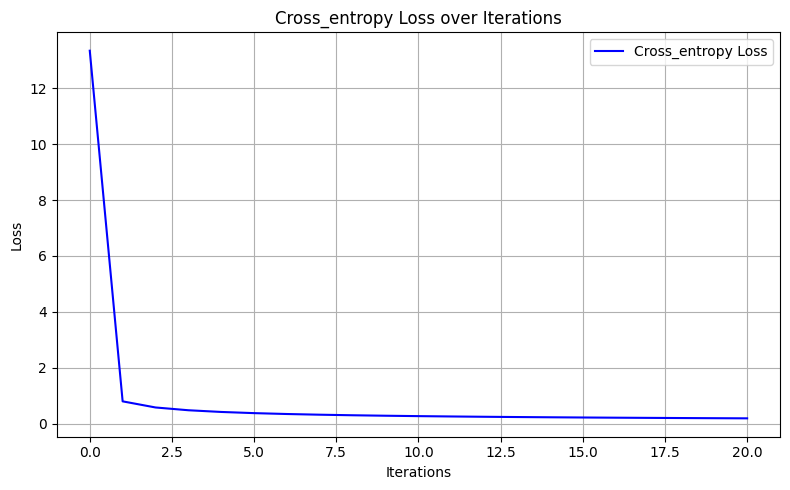

In [ ]:
if model == 4:
  W1, b1, W2, b2, W3, b3, losses = gradient_descent(X_train, Y_train, 1001, 0.1, loss_type = "mse")
  plot_loss(losses, loss_type="mse")
else:
  W1, b1, W2, b2, W3, b3, losses = gradient_descent(X_train, Y_train, 1001, 0.1, loss_type="cross_entropy")
  plot_loss(losses, loss_type="cross_entropy")

### 5. Cross Validation Set

In [ ]:
X_val = X_dev
Y_val = Y_dev

In [ ]:
def make_predictions(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    predictions = get_predictions(A3)
    return predictions

def test_prediction(index, W1, b1, W2, b2, W3, b3):
    current_image = X_val[:,index,None]
    prediction = make_predictions(X_val[:,index,None], W1,b1,W2, b2, W3, b3)
    label = Y_val[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28))*255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  3


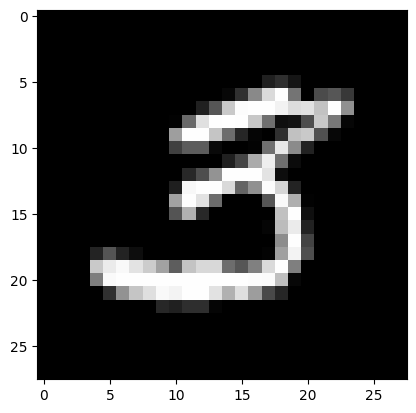

Prediction:  [7]
Label:  7


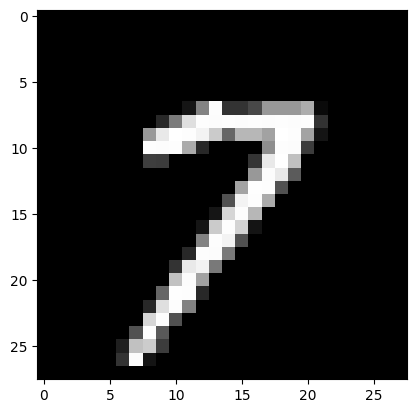

Prediction:  [1]
Label:  1


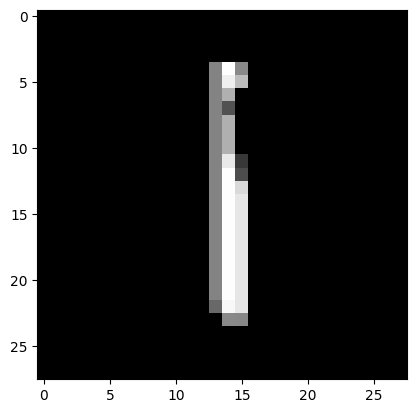

Prediction:  [8]
Label:  2


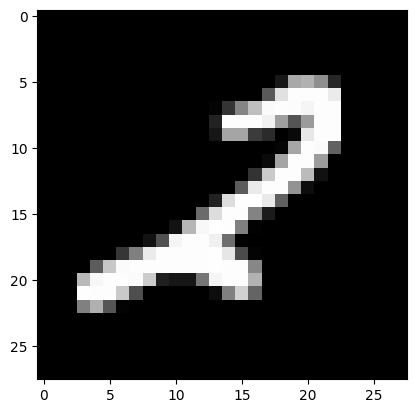

Prediction:  [7]
Label:  7


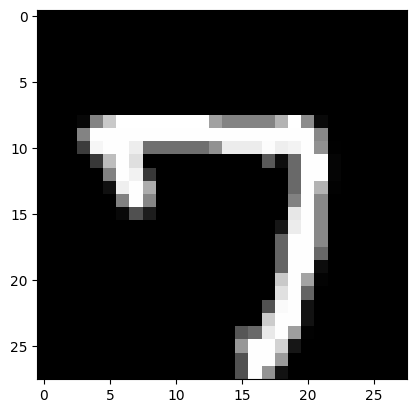

Prediction:  [1]
Label:  1


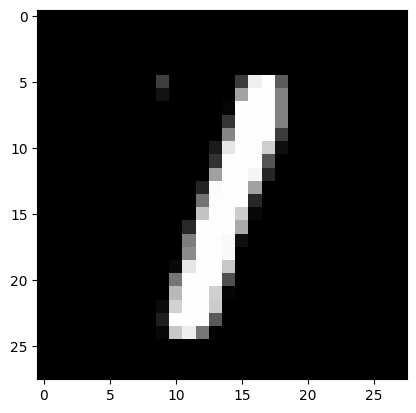

Prediction:  [3]
Label:  3


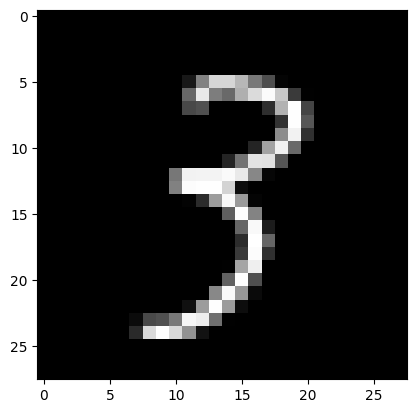

Prediction:  [1]
Label:  1


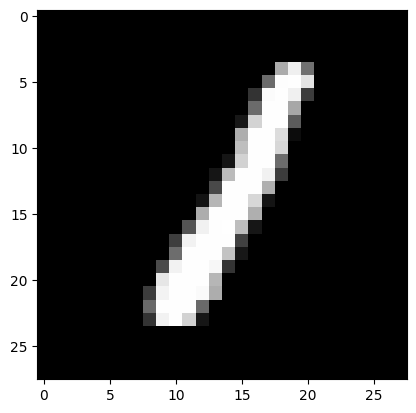

Prediction:  [6]
Label:  2


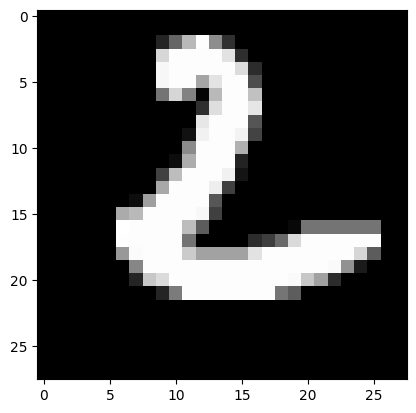

Prediction:  [4]
Label:  4


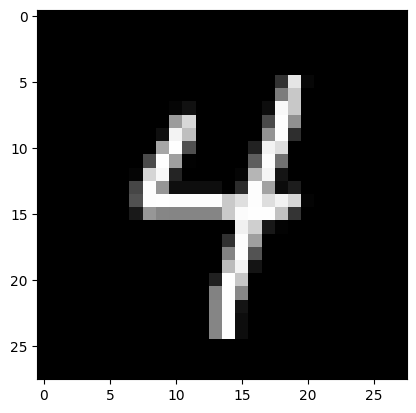

In [ ]:
for i in range(10):
  test_prediction(i, W1, b1, W2, b2, W3, b3)

In [ ]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2, W3, b3)
val_loss = compute_cross_entropy_loss(dev_predictions, Y_val)
print(f"Cross Validation Set Loss: {val_loss}")
100*get_accuracy(dev_predictions, Y_dev)

Cross Validation Set Loss: 0.312044763381604


np.float64(93.30000000000001)

### 6. Predictions on test.csv

In [ ]:
data2 = pd.read_csv('/content/test.csv')

In [ ]:
data2 = np.array(data2)
m, n = data2.shape
data_test = data2[:].T
X_test = data_test[0:n]
X_test = X_test / 255.
_,m_train = X_test.shape

In [ ]:
def make_predictions(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    predictions = get_predictions(A3)
    return predictions

def test_prediction2(index, W1, b1, W2, b2, W3, b3):
    current_image = X_test[:, index, None]
    prediction = make_predictions(X_test[:, index, None], W1, b1, W2, b2, W3, b3)
    print("Prediction: ", prediction)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]


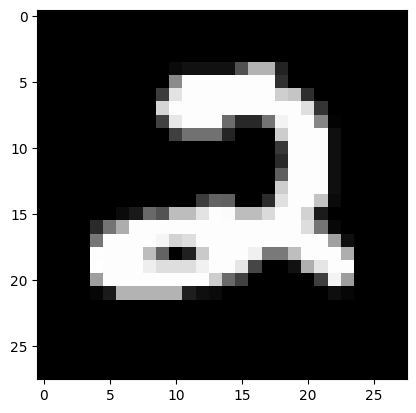

Prediction:  [0]


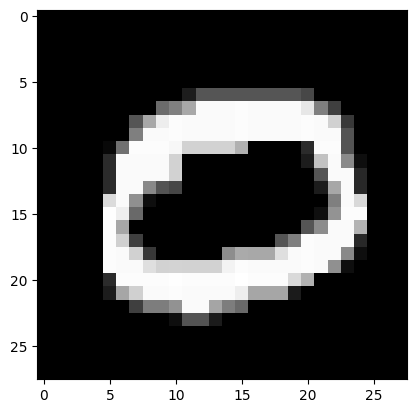

Prediction:  [9]


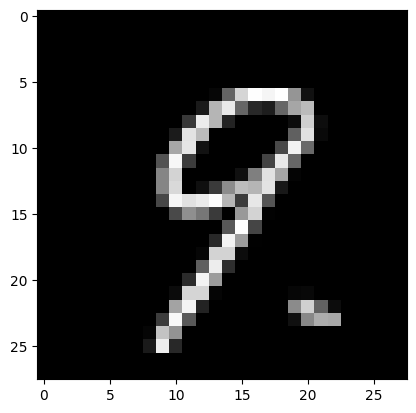

Prediction:  [2]


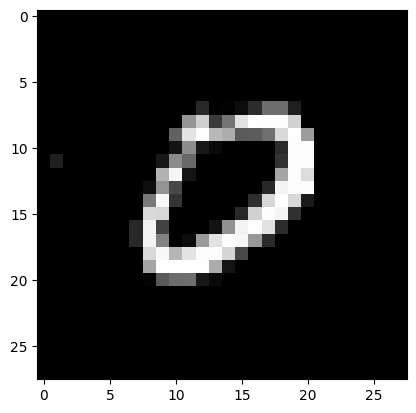

Prediction:  [2]


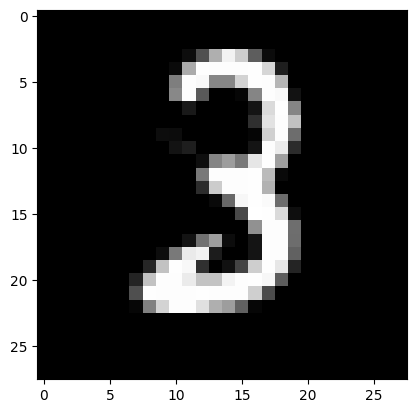

Prediction:  [7]


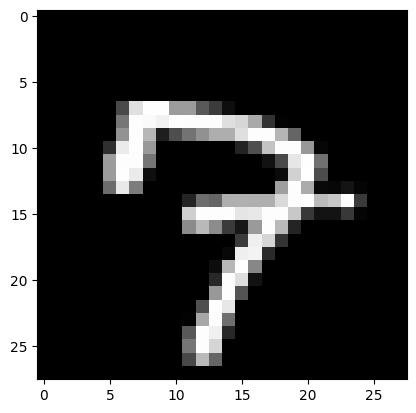

Prediction:  [0]


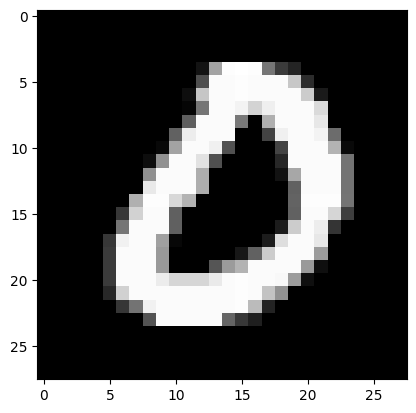

Prediction:  [3]


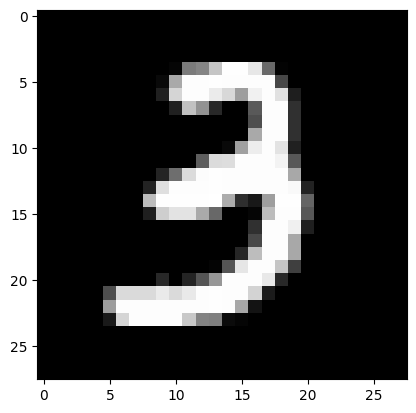

Prediction:  [0]


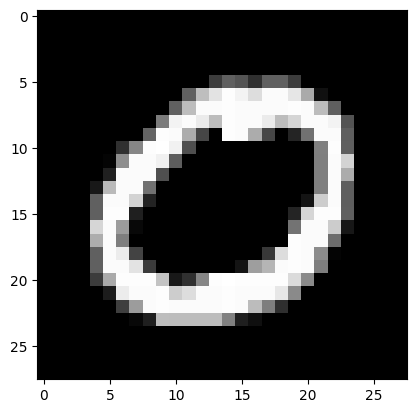

Prediction:  [3]


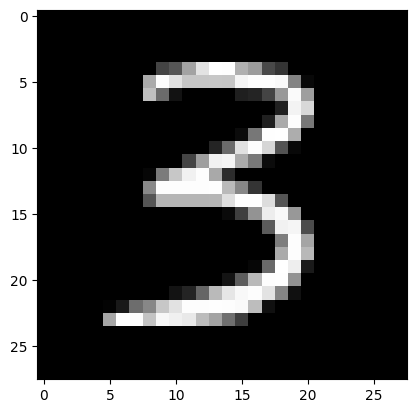

In [ ]:
for i in range(10):
  test_prediction2(i, W1, b1, W2, b2, W3, b3)

### 7. Filing Submission.csv

In [ ]:
predictions = make_predictions(X_test, W1, b1, W2, b2, W3, b3)
submission = pd.read_csv("/content/sample_submission.csv")
submission['Label'] = predictions
submission.to_csv("submission.csv", index=False)
print("submission.csv generated successfully!")

submission.csv generated successfully!


In [ ]:
#Some checks to verify the vlaues are correct:
print(submission.head())
print(submission['Label'].value_counts())

   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      2
4        5      2
Label
1    3204
7    2917
3    2808
9    2807
6    2780
2    2777
0    2748
4    2740
8    2717
5    2502
Name: count, dtype: int64
